Text(0, 0.5, 'Frequency')

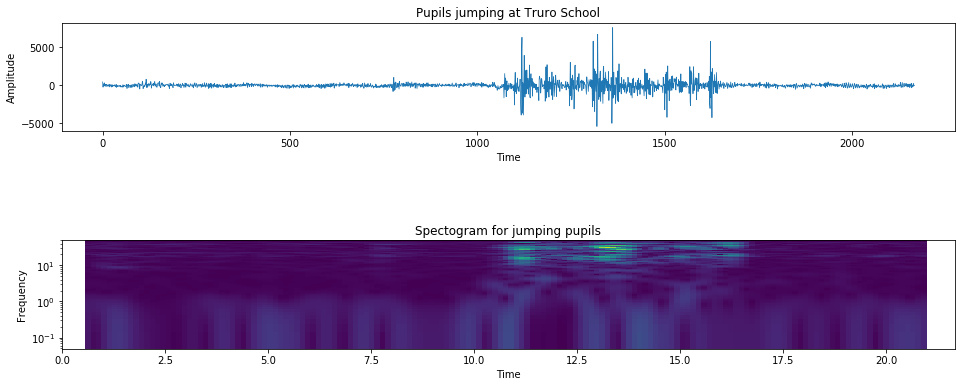

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from obspy.clients.fdsn import Client
client = Client(base_url='https://fdsnws.raspberryshakedata.com/')
from obspy import UTCDateTime
t = UTCDateTime("2020-01-08T14:14:10.000")
[ sbef, saft ] = [ 0, 20 ]
st = client.get_waveforms('AM', 'R7FA5', '00', 'EHZ',t - sbef, t + saft, attach_response = True) # Truro School
st.merge(method=0, fill_value='latest')
st.detrend(type='demean')
fig, axis = plt.subplots(2, 1, figsize=(16, 6))
plt.subplots_adjust(hspace=1)
axis[0].set_title('Pupils jumping at Truro School')
axis[0].plot(st[0], linewidth=0.75)
axis[0].set_xlabel('Time')
axis[0].set_ylabel('Amplitude')
axis[1].set_title('Spectogram for jumping pupils')
st.spectrogram(log=True, axes=axis[1])
axis[1].set_xlabel('Time')
axis[1].set_ylabel('Frequency')